<a href="https://colab.research.google.com/github/Marcelo-jmd/PA4-Innovacion/blob/main/regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de uso de Regresión Logística

##### Universidad Tecnológica del Perú
##### Curso: Innovación y Transformación Digital
##### MSc. Wilder Nina Choquehuayta

# Desarrollo

### Importaciones de librerias

In [ ]:
#import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving census_test.csv to census_test.csv
Saving census_train.csv to census_train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Descripción del dataset Census Income

Census Income Data Set: http://mlr.cs.umass.edu/ml/datasets/Census+Income

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

* **age:** continuous.
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num:** continuous.
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex:** Female, Male.
* **capital-gain:** continuous.
* **capital-loss:** continuous.
* **hours-per-week:** continuous.
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [47]:
df_raw = pd.read_csv('./census_train.csv')
df_test = pd.read_csv('./census_test.csv')
print(df_raw.shape, df_test.shape)
df_raw.head(5)
df_test.head(5)

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


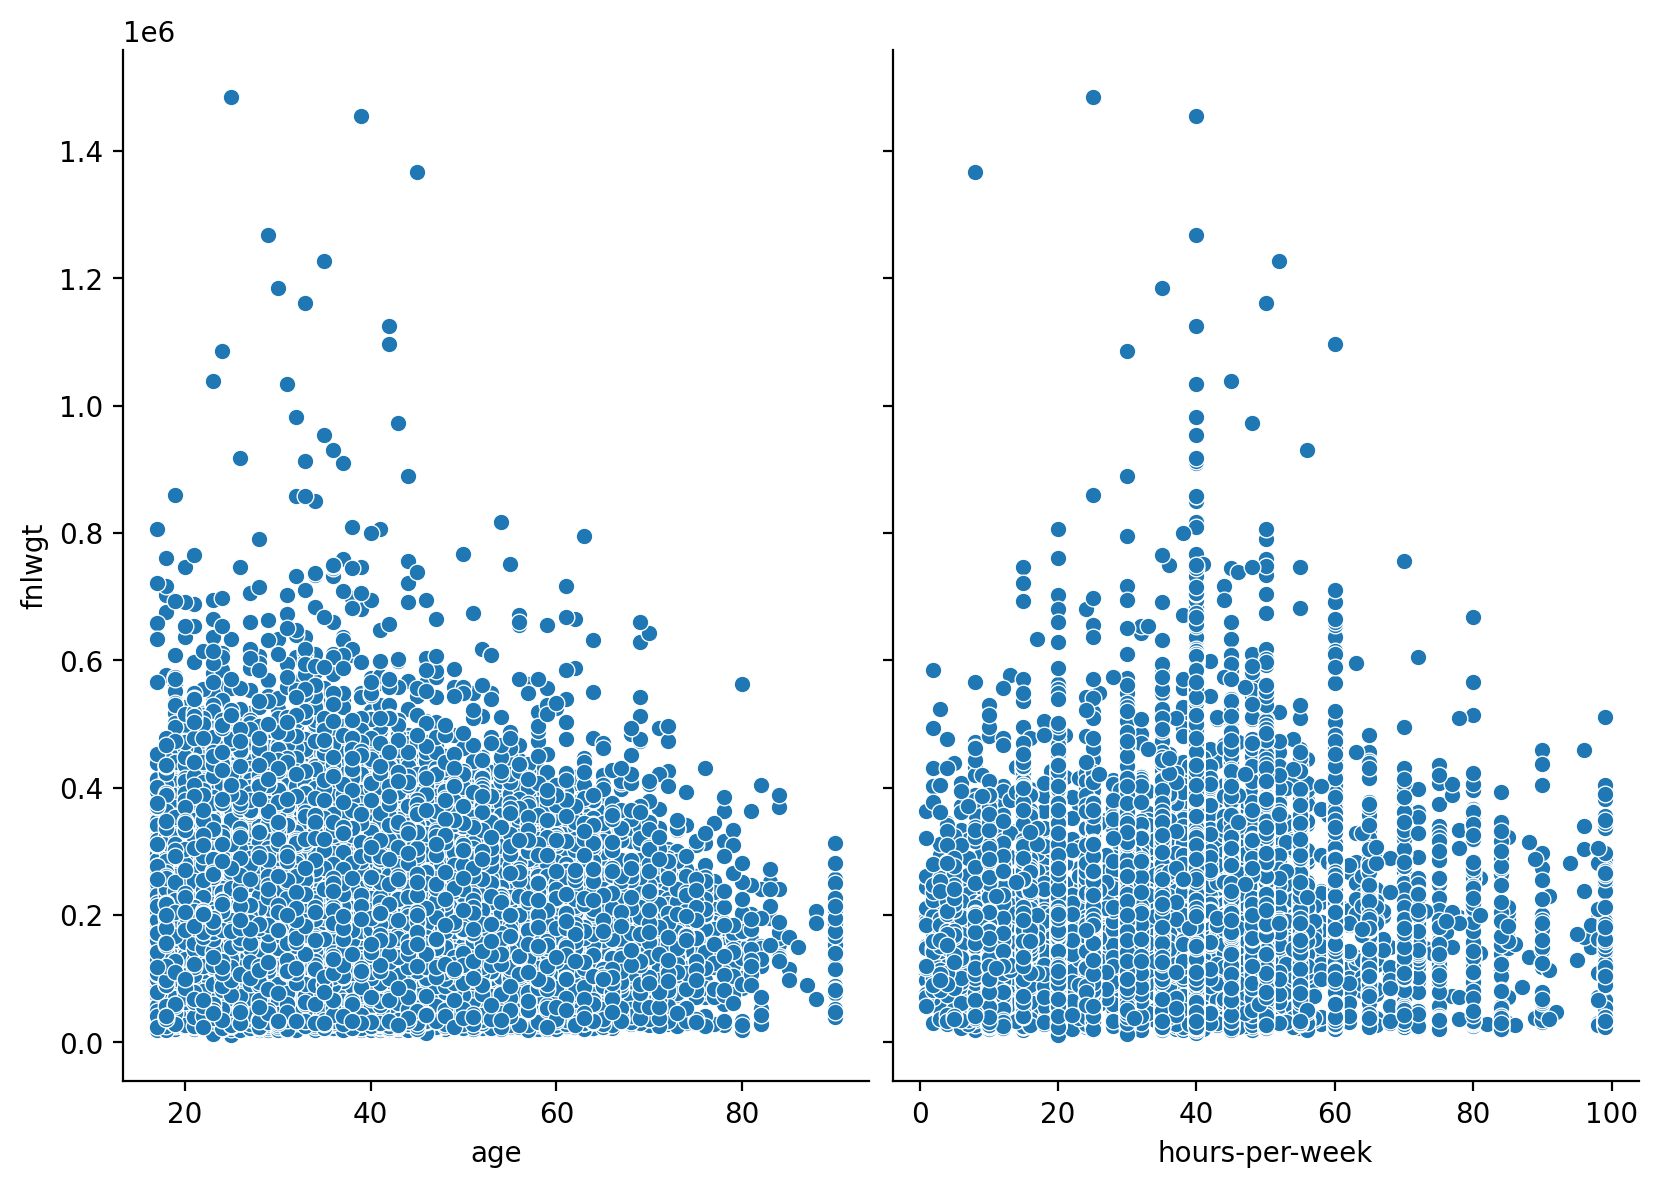

In [48]:
#Linealidad
p = sns.pairplot(df_raw, x_vars=['age','hours-per-week'], y_vars='fnlwgt', size=6, aspect=0.7)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


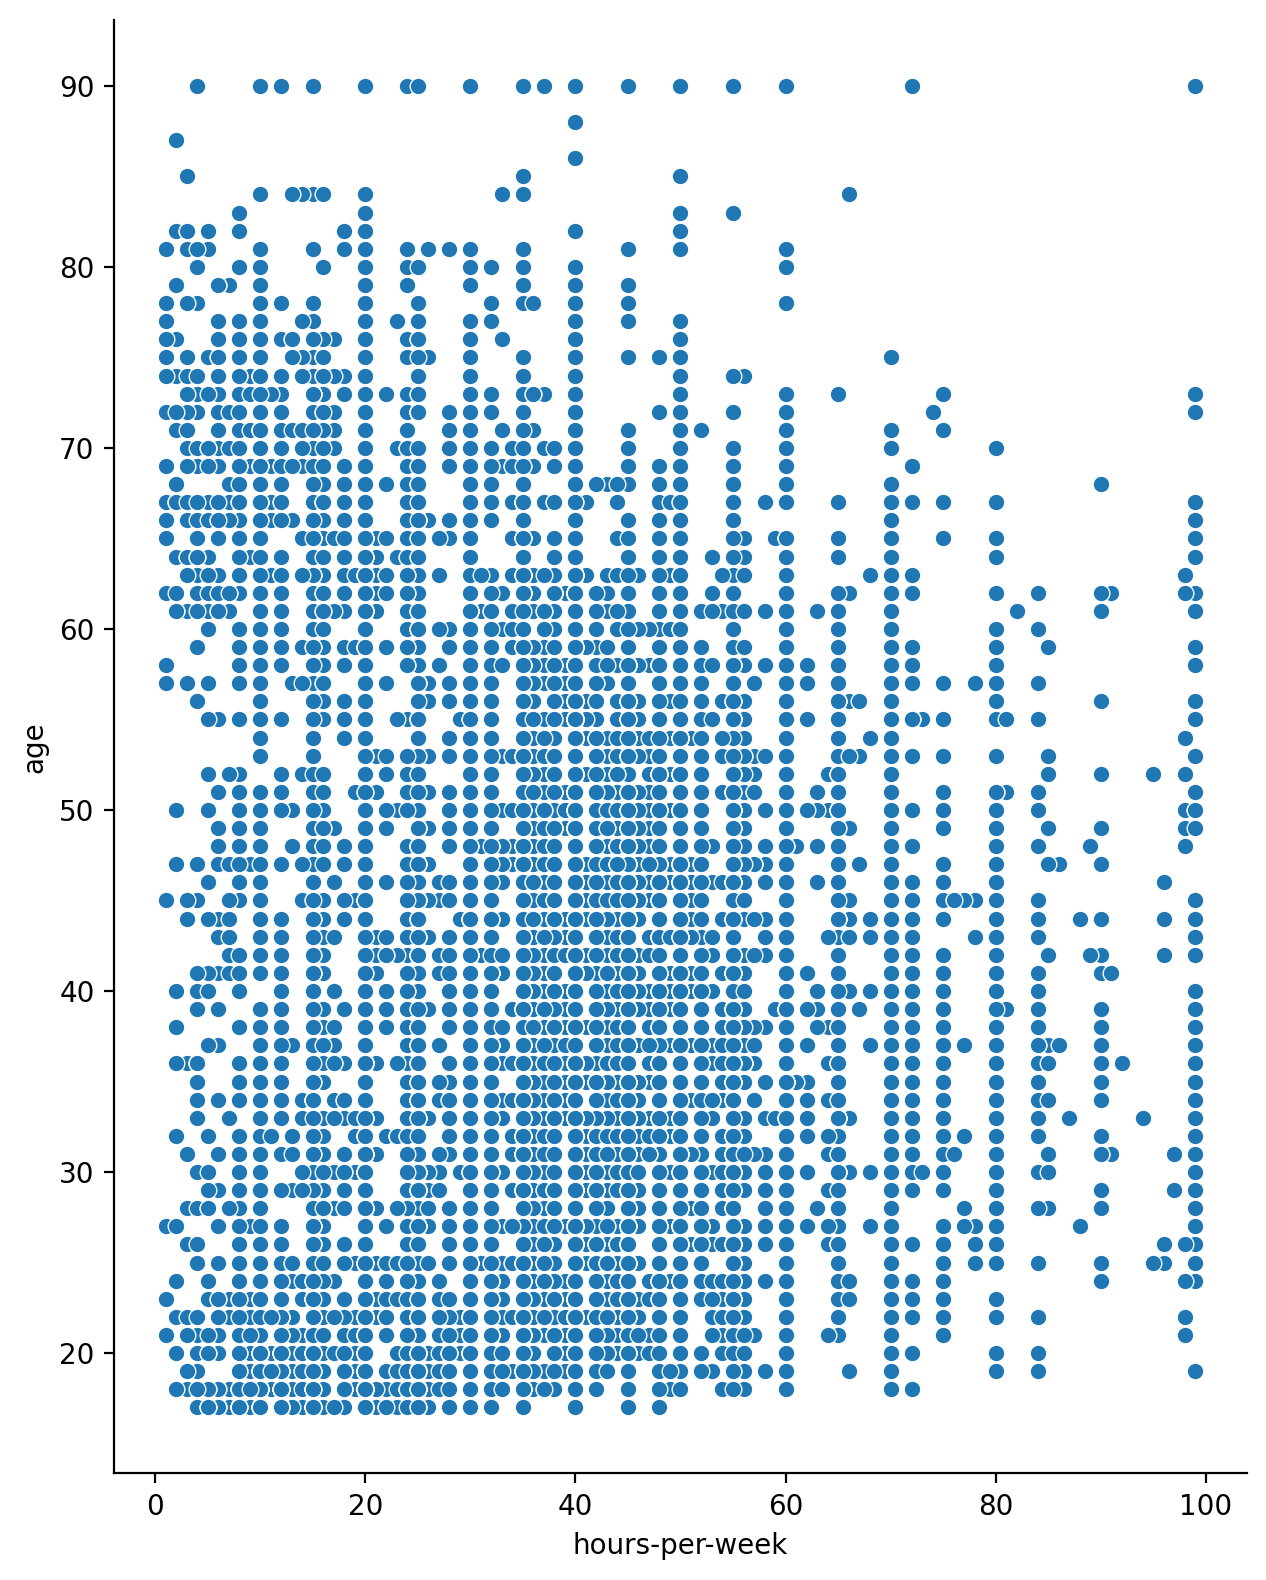

In [51]:
#Linealidad
p = sns.pairplot(df_raw, x_vars=['hours-per-week'], y_vars='age', size=8, aspect=0.8)

### Preprocesamiento de datos


In [53]:
df_raw = df_raw.drop('education', axis=1) \
                .rename({'education-num': 'education'}, axis=1)

for n, col in df_raw.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'label':
        # Transforma la variable a tipo category
        df_raw[n] = col.astype('category')

df = df_raw.copy()

# Convertir cada columna categórica a numérica
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1

df.head()

/tmp/ipython-input-53-4112968889.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(col):
/tmp/ipython-input-53-4112968889.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(col):
/tmp/ipython-input-53-4112968889.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(col):
/tmp/ipython-input-53-4112968889.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(col):
/tmp/ipython-input-53-4112968889.py:13: DeprecationWarning: is_categoric

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,8,77516,13,5,2,2,5,2,2174,0,40,40,<=50K
1,50,7,83311,13,3,5,1,5,2,0,0,13,40,<=50K
2,38,5,215646,9,1,7,2,5,2,0,0,40,40,<=50K
3,53,5,234721,7,3,7,1,3,2,0,0,40,40,<=50K
4,28,5,338409,13,3,11,6,3,1,0,0,40,6,<=50K


### Probando el modelo (holdout validation)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('label', axis=1)
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (26048, 13)
Validation shape: (6513, 13)


In [ ]:
#Entrenamiento de modelo de regresión logística
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(penalty='l2',solver='liblinear')
m.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
accuracy = m.score(x_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.7933364041148472


### Tarea: Realizar la interpretación de los resultados obtenidos

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


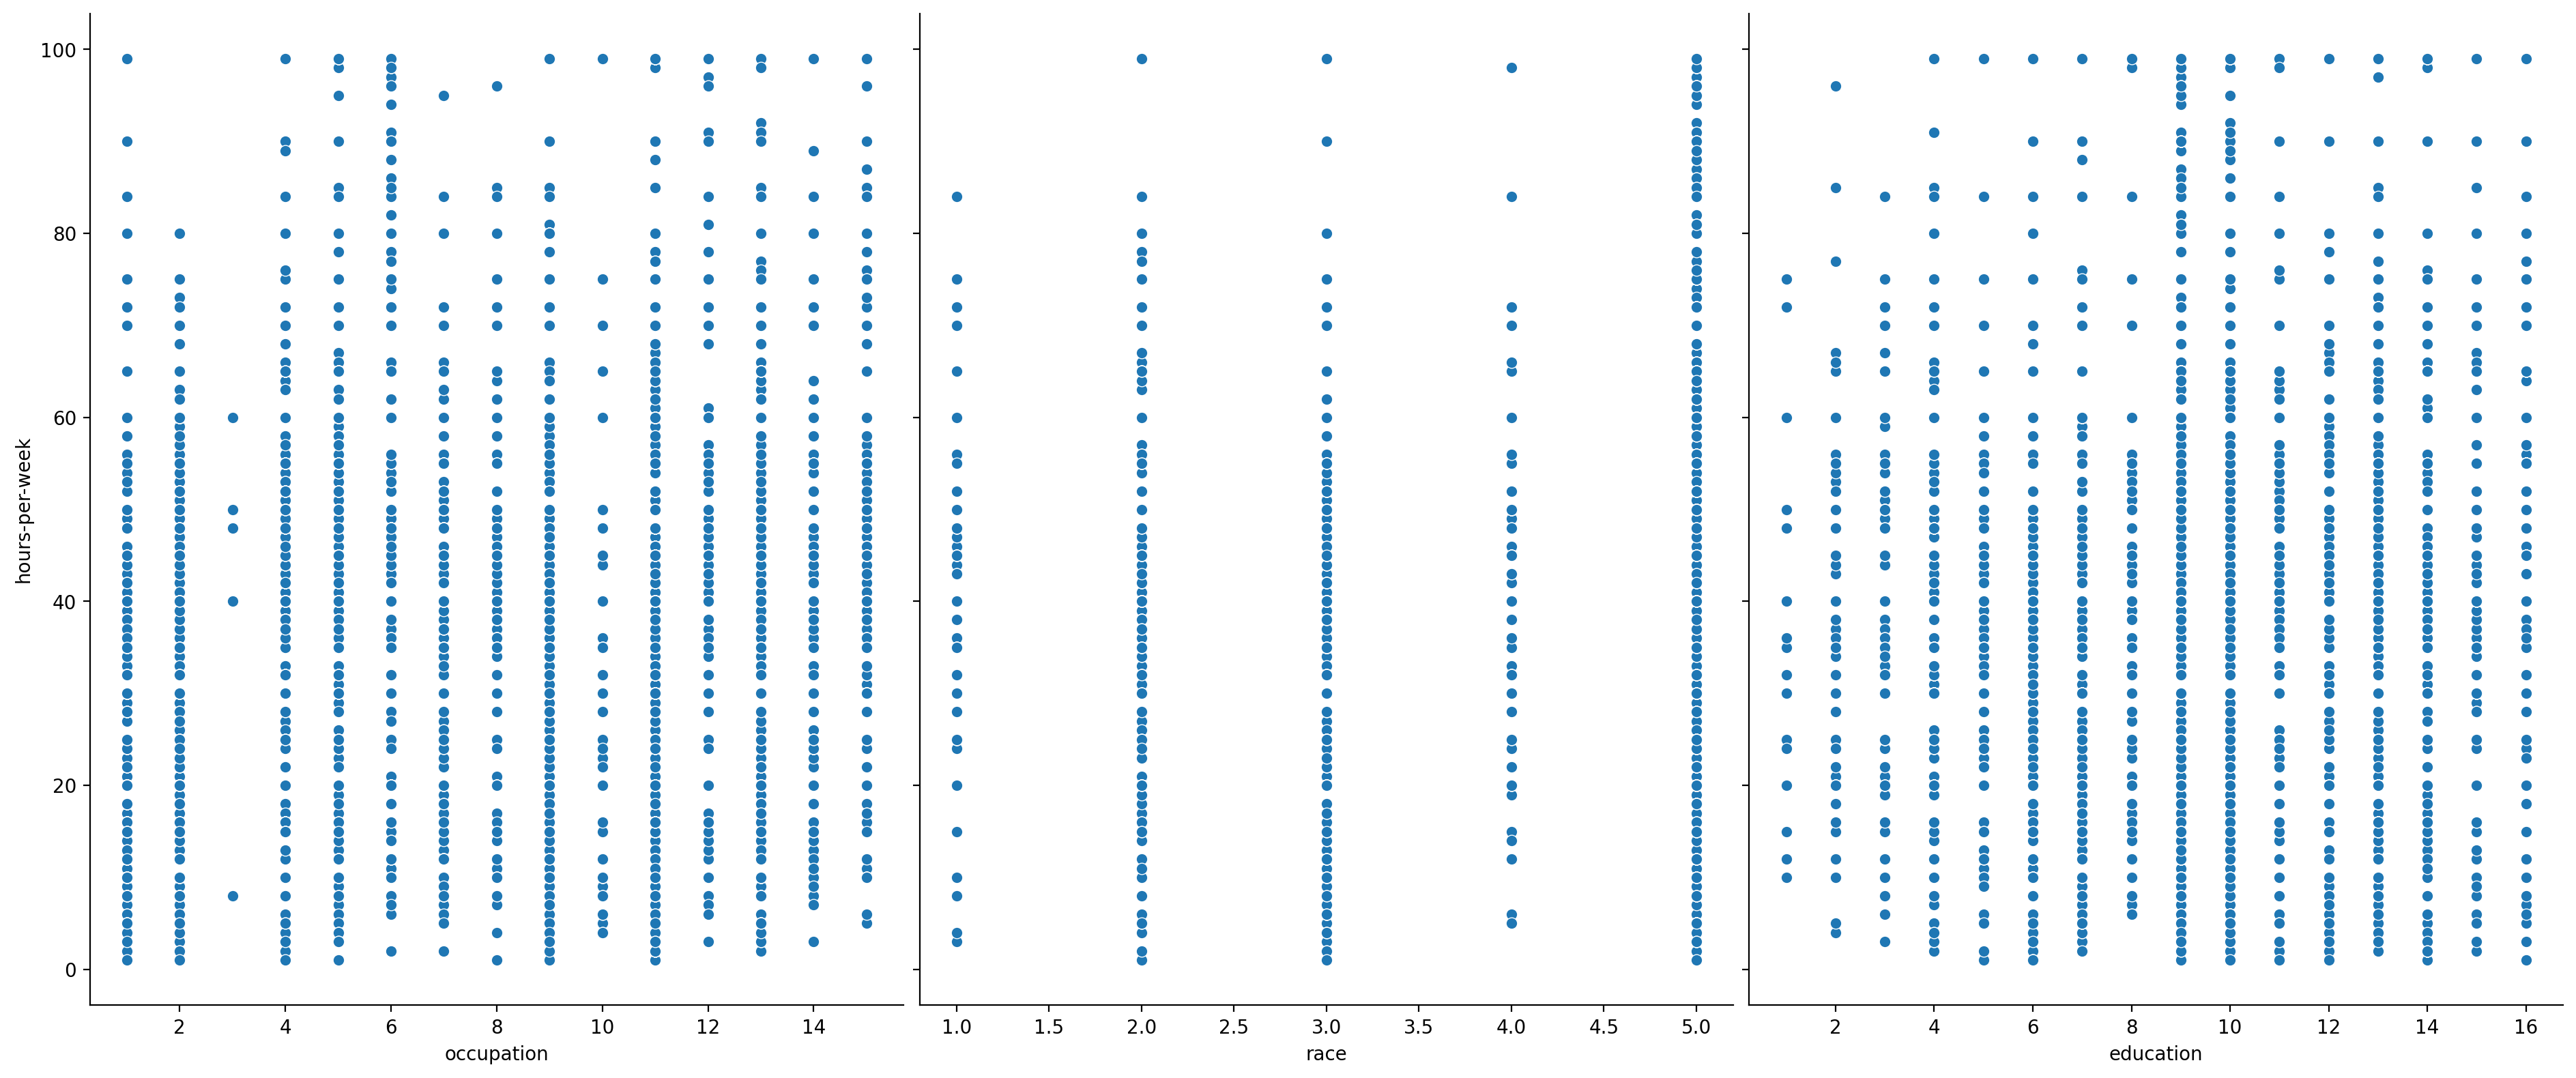

In [59]:
#Linealidad
df.head()
p = sns.pairplot(df, x_vars=['occupation','race','education'], y_vars='hours-per-week', size=8, aspect=0.8)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones en el conjunto de validación
y_pred = m.predict(x_val)

# Mostrar la exactitud
print("Accuracy:", accuracy_score(y_val, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Reporte de clasificación con precisión, recall y F1
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7933364041148472
Confusion Matrix:
 [[4708  234]
 [1112  459]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      4942
        >50K       0.66      0.29      0.41      1571

    accuracy                           0.79      6513
   macro avg       0.74      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



### Matriz de confusión

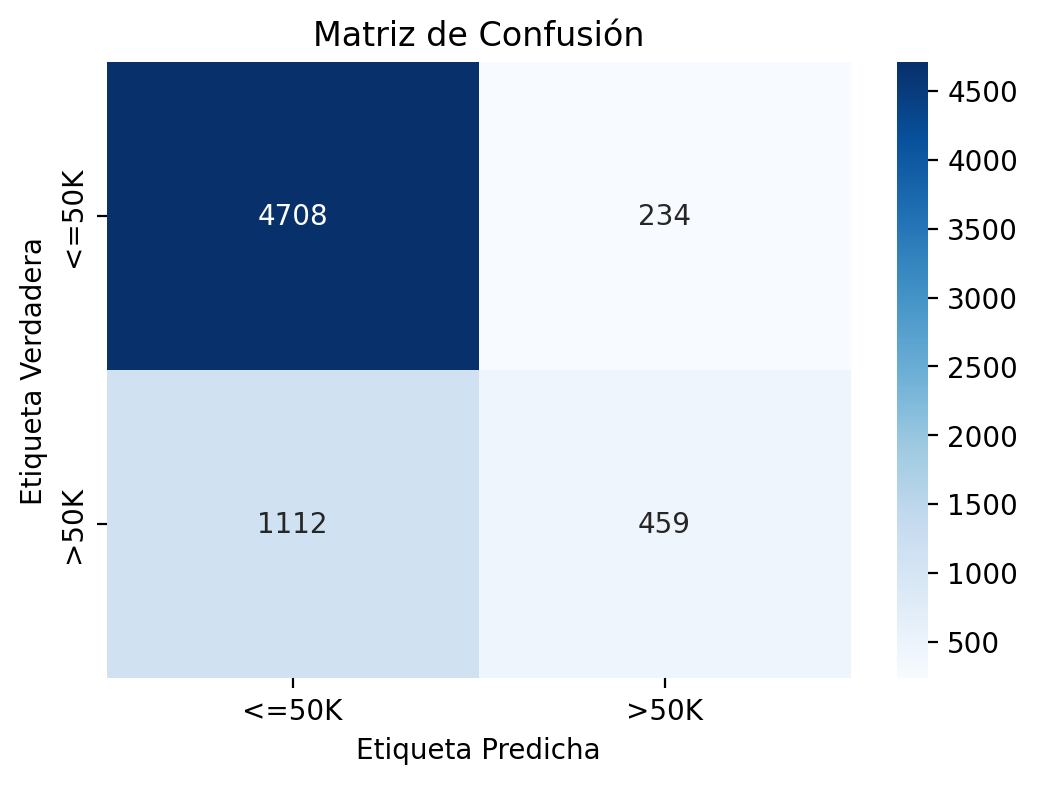

In [62]:
# Calculamos la matriz de confusión
conf_mat = confusion_matrix(y_val, y_pred)

# Creamos el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()